# Internship Test Part 2
Machine Learning Hackathon
#innominions


In [1]:
#Import important libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Loading the Dataset:

In [26]:
data1 = pd.read_csv('data_2_var.csv',header=None)

In [32]:
data1.rename(columns={0:"A",1:"B"},inplace=True)

In [33]:
data1.head(5)

,A,B
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [34]:
data1.shape

(1111, 2)

In [35]:
data1.tail(5)

,A,B
1106,-115.366669,121.000000
1107,-119.954237,123.609122
1108,-109.942155,127.197394
1109,-111.515368,128.170885
1110,-110.344221,123.087950


In [36]:
data1.columns

Index(['A', 'B'], dtype='object')

In [37]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1111 non-null   float64
 1   B       1111 non-null   float64
dtypes: float64(2)
memory usage: 17.5 KB


In [38]:
data1.describe()

,A,B
count,1111.000000,1111.000000
mean,6.783026,-26.187358
std,79.383668,69.794973
min,-134.962839,-132.422167
25%,-53.521987,-77.000000
50%,15.737782,-46.072638
75%,76.134647,7.435231
max,134.605775,134.425495


## Data Cleaning

In [39]:
#Check for missing values:
data1.isnull().sum()

A    0
B    0
dtype: int64

There are no null values present

<AxesSubplot:>

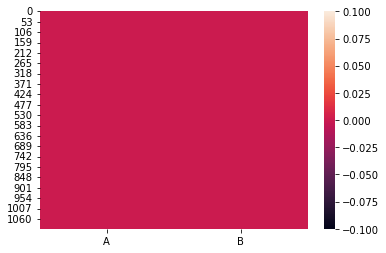

In [40]:
sns.heatmap(data1.isnull())

In [41]:
#Checking for blank spaces, random characters in each column

search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in DF:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((DF[c] == s).sum())

  in -122.7406674 =  0
? in -122.7406674 =  0
- in -122.7406674 =  0
 ? in -122.7406674 =  0
 - in -122.7406674 =  0
?  in -122.7406674 =  0
-  in -122.7406674 =  0
 ?  in -122.7406674 =  0
 -  in -122.7406674 =  0
NA in -122.7406674 =  0
N/A in -122.7406674 =  0
 NA in -122.7406674 =  0
 N/A in -122.7406674 =  0
  in -130.5720846 =  0
? in -130.5720846 =  0
- in -130.5720846 =  0
 ? in -130.5720846 =  0
 - in -130.5720846 =  0
?  in -130.5720846 =  0
-  in -130.5720846 =  0
 ?  in -130.5720846 =  0
 -  in -130.5720846 =  0
NA in -130.5720846 =  0
N/A in -130.5720846 =  0
 NA in -130.5720846 =  0
 N/A in -130.5720846 =  0


There are no blank spaces, random characters in the columns

In [42]:
data1.nunique()

A    991
B    969
dtype: int64

In [43]:
data1.corr()

,A,B
A,1.000000,0.455804
B,0.455804,1.000000


Here, the dataset has positive moderate correlation

### Interpreting Relationship between Dependent and Independent Variables
Analyzing the Target Variable

<AxesSubplot:xlabel='B', ylabel='Density'>

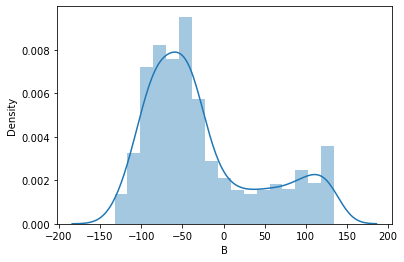

In [44]:
sns.distplot(data1.B)

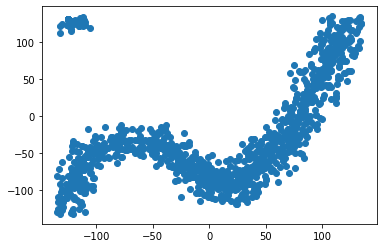

In [45]:
plt.scatter(data1["A"],data1['B'])

scatter plot os forming towards upward. so, both the column reflect positive relation

In [47]:
#detecting outliers

from scipy.stats import zscore

zscor = zscore(data1)
z_score_abs = np.abs(zscor)

data2 = data1[(z_score_abs < 3).all(axis=1)]

In [48]:
data2.shape

(1111, 2)

Separating the independent and target variables into x and y

In [50]:
X=pd.DataFrame({"A":data2["A"]})
Y=pd.DataFrame({"B":data2["B"]})

In [51]:
X

,A
0,-122.740667
1,-121.531419
2,-134.917019
3,-120.605951
4,-129.894781
...,...
1106,-115.366669
1107,-119.954237
1108,-109.942155
1109,-111.515368


In [52]:
Y

,B
0,-130.572085
1,-129.938929
2,-130.141832
3,-125.760932
4,-112.785214
...,...
1106,121.000000
1107,123.609122
1108,127.197394
1109,128.170885


In [53]:
X.shape

(1111, 1)

In [54]:
Y.shape

(1111, 1)

In [ ]:
Creating train-test split

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [117]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.33,random_state=10)

In [118]:
X.shape, Y.shape

((1111, 1), (1111, 1))

### Regression Model Building

In [119]:
model= LinearRegression().fit(x_train,y_train)

In [120]:
model.coef_

array([[0.41057523]])

In [121]:
model.score(x_train,y_train)

0.21867445274916286

In [122]:
model.intercept_

array([-26.21475823])

In [123]:
pred=model.predict(x_test)
pred

array([[-28.31992595],
       [ 17.56624631],
       [-12.81632072],
       [ -6.65769227],
       [-71.65581754],
       [-72.34972909],
       [-80.97180893],
       [-51.51095737],
       [ 15.92394539],
       [-59.93727505],
       [-20.33278352],
       [-29.32968366],
       [-46.89040957],
       [-37.58448493],
       [-17.01383615],
       [ 23.31429953],
       [-22.38561832],
       [-71.80669383],
       [-79.6943656 ],
       [-52.06640832],
       [-36.94340235],
       [-75.5967321 ],
       [ 17.00662205],
       [ 23.48951017],
       [-77.68720708],
       [-73.1888864 ],
       [-35.88782028],
       [ 25.62356296],
       [ 20.85084815],
       [-70.29685294],
       [-32.6706798 ],
       [  4.99558072],
       [-23.4912767 ],
       [-25.13357763],
       [-23.85426396],
       [ 14.10319796],
       [-64.54879972],
       [-74.53350829],
       [ 27.94404794],
       [-11.1740198 ],
       [ 12.65368071],
       [-81.399349  ],
       [  2.77851252],
       [  2

In [124]:
print('Predicted values',pred)

Predicted values [[-28.31992595]
 [ 17.56624631]
 [-12.81632072]
 [ -6.65769227]
 [-71.65581754]
 [-72.34972909]
 [-80.97180893]
 [-51.51095737]
 [ 15.92394539]
 [-59.93727505]
 [-20.33278352]
 [-29.32968366]
 [-46.89040957]
 [-37.58448493]
 [-17.01383615]
 [ 23.31429953]
 [-22.38561832]
 [-71.80669383]
 [-79.6943656 ]
 [-52.06640832]
 [-36.94340235]
 [-75.5967321 ]
 [ 17.00662205]
 [ 23.48951017]
 [-77.68720708]
 [-73.1888864 ]
 [-35.88782028]
 [ 25.62356296]
 [ 20.85084815]
 [-70.29685294]
 [-32.6706798 ]
 [  4.99558072]
 [-23.4912767 ]
 [-25.13357763]
 [-23.85426396]
 [ 14.10319796]
 [-64.54879972]
 [-74.53350829]
 [ 27.94404794]
 [-11.1740198 ]
 [ 12.65368071]
 [-81.399349  ]
 [  2.77851252]
 [  2.37496279]
 [-11.50921718]
 [-12.14236704]
 [  4.90779184]
 [ -0.09291754]
 [-30.52790524]
 [ 13.05203677]
 [ 17.56624631]
 [-21.4385701 ]
 [-42.86447675]
 [  8.9174303 ]
 [-30.47105562]
 [  7.76617704]
 [ 14.43080818]
 [-74.33980181]
 [ -1.9224886 ]
 [ -3.78366566]
 [-18.9128609 ]
 [ 26.9

In [125]:
preddf=pd.DataFrame(data=pred)
preddf

,0
0,-28.319926
1,17.566246
2,-12.816321
3,-6.657692
4,-71.655818
...,...
362,-32.984077
363,-14.665508
364,-75.459131
365,-1.320214


In [126]:
model.score(x_test,y_test)

0.16859174992228798

In [127]:
print("Mean absolute error::",mean_absolute_error(y_test, pred))
print("Mean squared error::",mean_squared_error(y_test,pred))
print("Root mean square ::",np.sqrt(mean_squared_error(y_test,pred)))

Mean absolute error:: 47.24815529047443
Mean squared error:: 3723.3678101214896
Root mean square :: 61.01940519311451


In [129]:
print('R2 score::',r2_score(y_test,pred))

R2 score:: 0.16859174992228798


In [130]:
t=np.array ( [2,0.365,0.095,0.5140,0.1010,0.1500,0.1510])

### Saving the model

In [133]:
import joblib

joblib.dump(preddf,'model.obj')

loadmodel=joblib.load('model.obj')


In [134]:
print(loadmodel)

             0
0   -28.319926
1    17.566246
2   -12.816321
3    -6.657692
4   -71.655818
..         ...
362 -32.984077
363 -14.665508
364 -75.459131
365  -1.320214
366 -18.153799

[367 rows x 1 columns]
